<a href="https://colab.research.google.com/github/amolpatil1976/Synch-Internship/blob/main/Synch_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install visualkeras pydot pydotplus graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
import visualkeras

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

In [69]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [70]:
print(len(train_df))
print(len(test_df))

27455
7172


In [71]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [72]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [74]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

<Axes: >

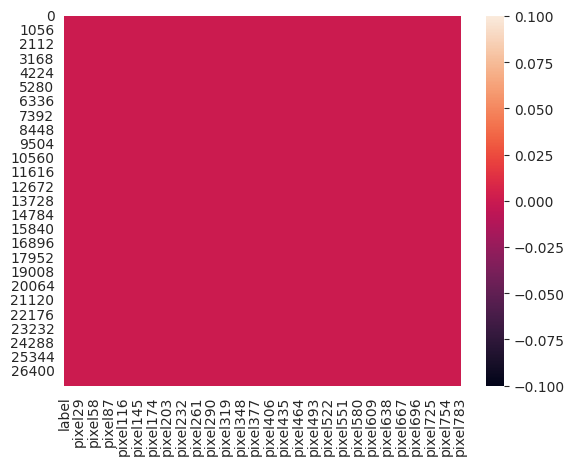

In [75]:
sns.heatmap(train_df.isnull())

<Axes: >

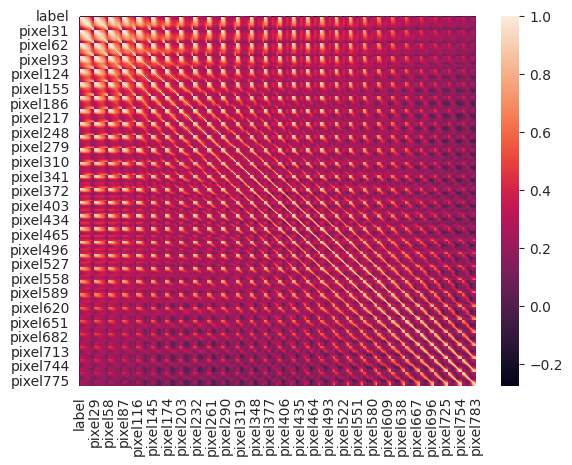

In [76]:
sns.heatmap(train_df.corr())

In [77]:
test_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

<Axes: >

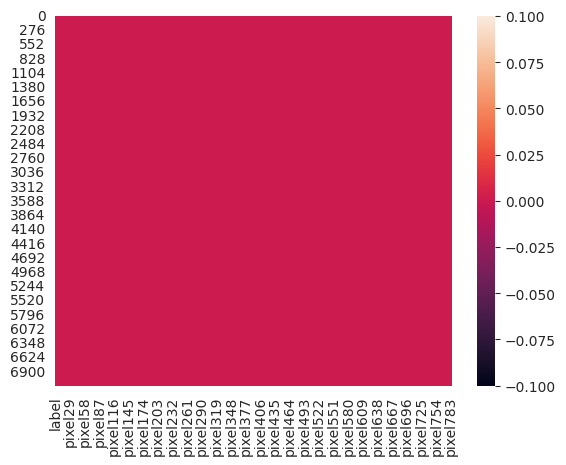

In [78]:
sns.heatmap(test_df.isnull())

<Axes: >

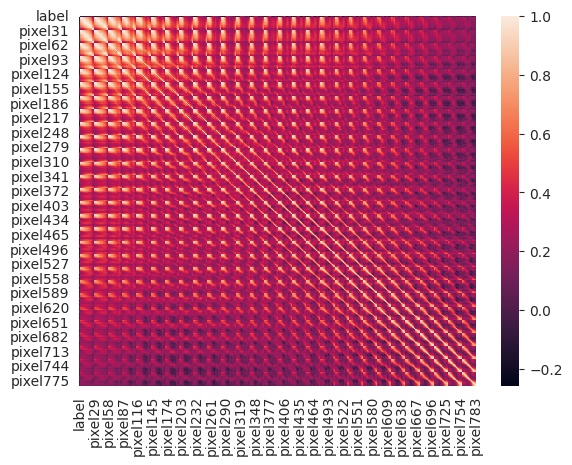

In [79]:
sns.heatmap(test_df.corr())

In [80]:
train_df.shape,test_df.shape

((27455, 785), (7172, 785))

<Axes: xlabel='label', ylabel='count'>

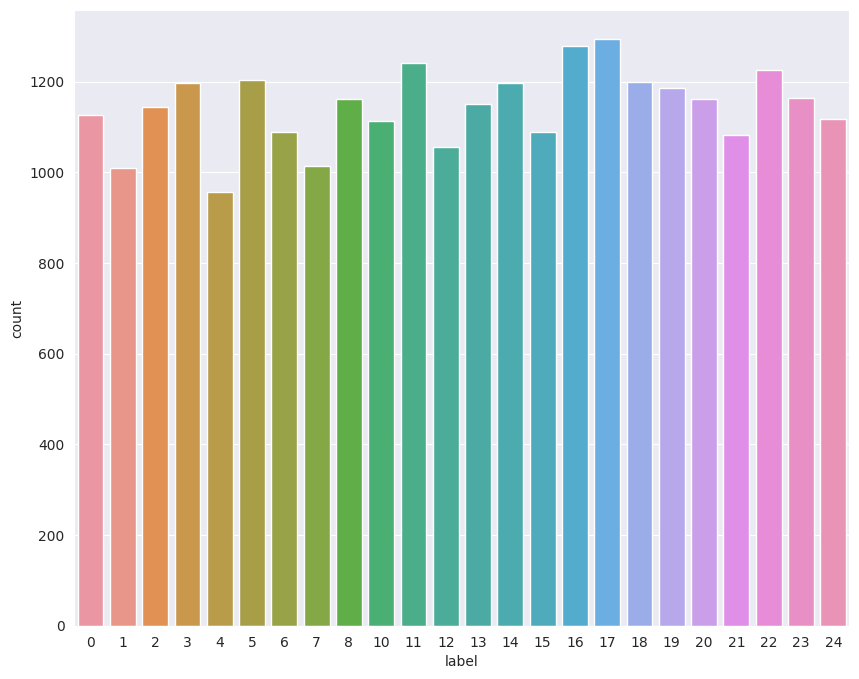

In [81]:
plt.figure(figsize = (10,8)) 
sns.set_style("darkgrid")
sns.countplot(data = train_df, x = train_df['label'])

In [82]:
y_train = train_df['label']
y_test = test_df['label']

x_train = train_df.drop('label',axis=1)
x_train = np.array(x_train,dtype='float32')/255

x_test = test_df.drop('label',axis=1)
x_test = np.array(x_test,dtype='float32')/255

print('x_train : {}\n'.format(x_train[:]))
print('Y-train shape: {}\n'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.41960785 0.4627451  0.49803922 ... 0.8        0.79607844 0.7921569 ]
 [0.60784316 0.6156863  0.6117647  ... 0.40392157 0.5294118  0.58431375]
 [0.73333335 0.7372549  0.7372549  ... 0.7647059  0.7607843  0.7647059 ]
 ...
 [0.68235296 0.68235296 0.68235296 ... 0.7921569  0.78431374 0.78431374]
 [0.69411767 0.70980394 0.72156864 ... 0.2509804  0.34117648 0.3647059 ]
 [0.7019608  0.7058824  0.7058824  ... 0.8039216  0.81960785 0.84313726]]

Y-train shape: 0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

x_test shape: (7172, 784)


In [83]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=1234,)

In [84]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [85]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

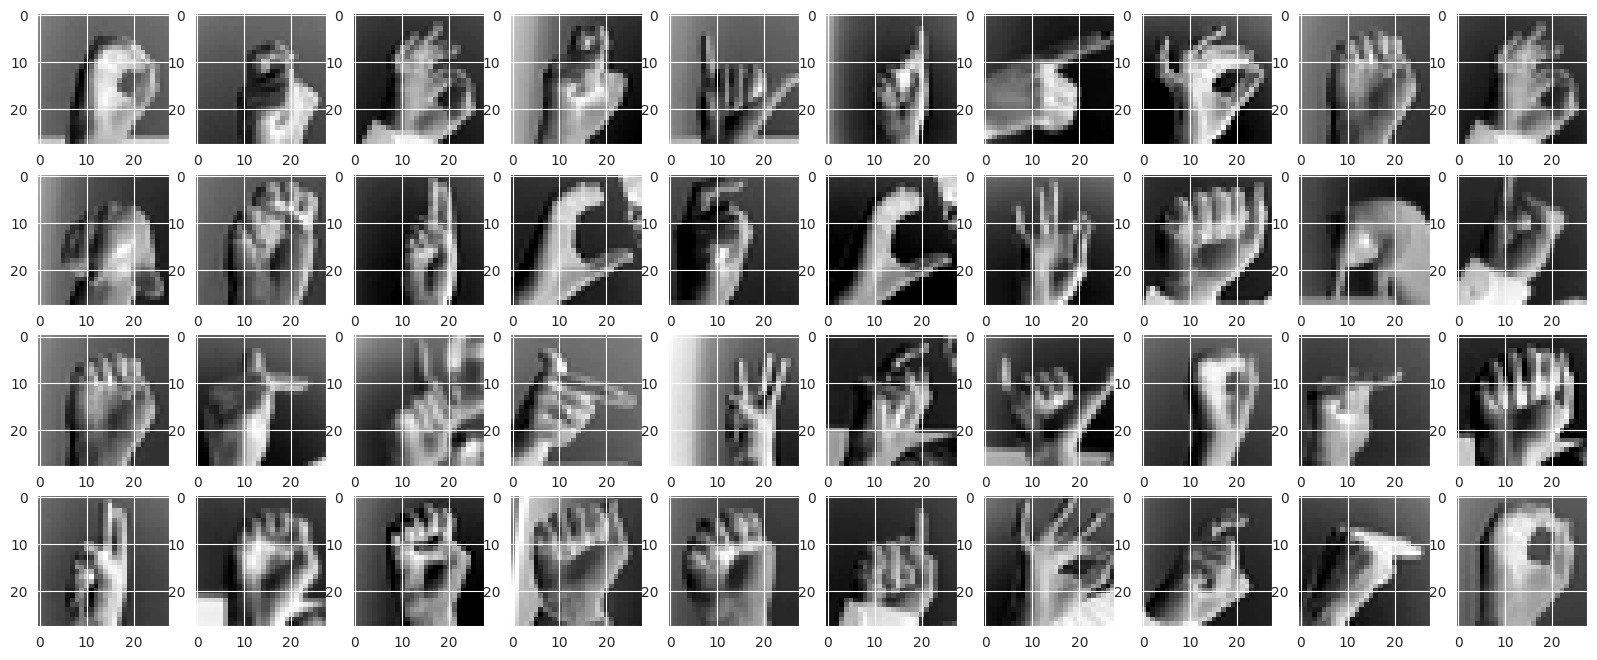

In [86]:
plt.figure(figsize=(20, 8))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray_r')
plt.show()

In [87]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1)

datagen.fit(x_train)

In [88]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [89]:
model = Sequential()

In [90]:
from tensorflow.keras import layers, Sequential  

In [91]:
model.add(Conv2D(55, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), strides = 1, padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))

model.add(Conv2D(45, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 55)        550       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 55)       220       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 55)       0         
 2D)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 45)        22320     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 45)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 45)      

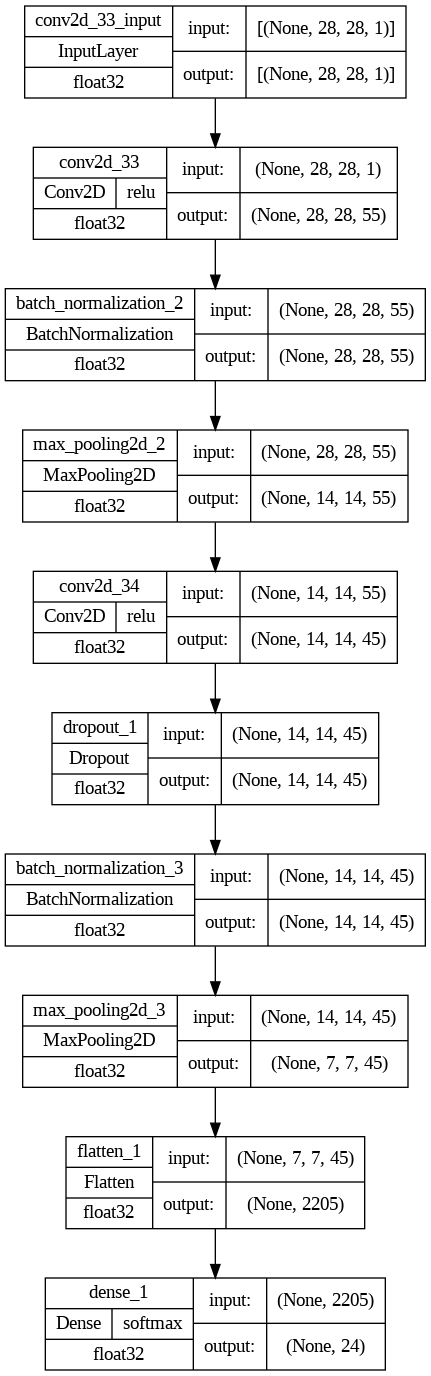

In [92]:
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [93]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
hist= model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data = (x_test,y_test), callbacks = [learning_rate_reduction])

Epoch 1/10
204/204 [==============================] - 94s 446ms/step - loss: 1.4449 - accuracy: 0.5635 - val_loss: 2.8939 - val_accuracy: 0.0565 - lr: 0.0010
Epoch 2/10
204/204 [==============================] - 87s 429ms/step - loss: 0.6001 - accuracy: 0.8080 - val_loss: 1.7142 - val_accuracy: 0.5098 - lr: 0.0010
Epoch 3/10
204/204 [==============================] - 86s 420ms/step - loss: 0.3782 - accuracy: 0.8742 - val_loss: 0.3380 - val_accuracy: 0.9189 - lr: 0.0010
Epoch 4/10
204/204 [==============================] - 87s 425ms/step - loss: 0.2800 - accuracy: 0.9099 - val_loss: 0.1831 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 5/10
204/204 [==============================] - 87s 425ms/step - loss: 0.2111 - accuracy: 0.9338 - val_loss: 0.1619 - val_accuracy: 0.9430 - lr: 0.0010
Epoch 6/10
204/204 [==============================] - 87s 425ms/step - loss: 0.1782 - accuracy: 0.9436 - val_loss: 0.0971 - val_accuracy: 0.9703 - lr: 0.0010
Epoch 7/10
204/204 [==============================] 

In [95]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 10s 44ms/step - loss: 0.0501 - accuracy: 0.9831
Accuracy of the model is -  98.31288456916809 %


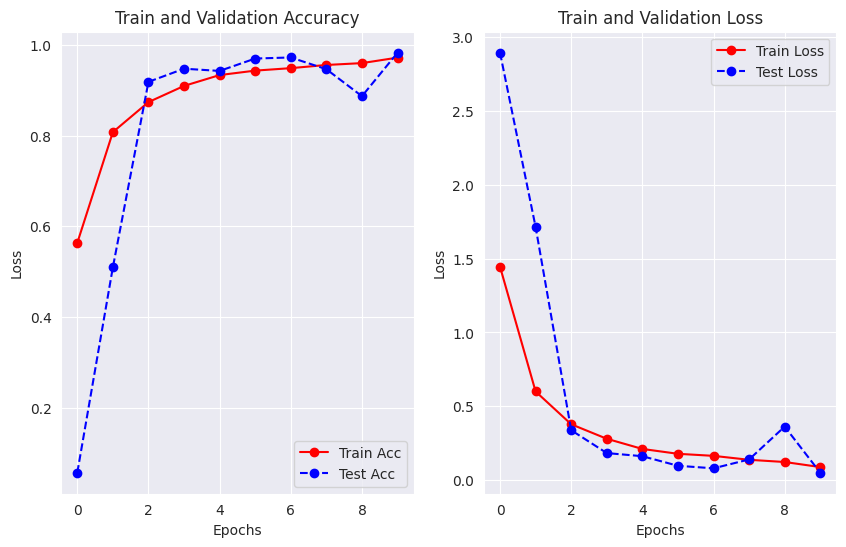

In [96]:
epochs = [i for i in range(10)]

fig,ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
vall_acc= hist.history['val_accuracy']
vall_loss=hist.history['val_loss']
fig.set_size_inches(10,6)

ax[0].plot(epochs, train_acc, color = 'red', marker = 'o', linestyle = '-', label='Train Acc')
ax[0].plot(epochs, vall_acc, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, train_loss, color = 'red', marker = 'o', linestyle = '-', label='Train Loss')
ax[1].plot(epochs, vall_loss, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()